![alt text](https://upload.wikimedia.org/wikipedia/commons/1/11/TensorFlowLogo.svg "TensorFlow")

                                                                                                        Source - Wikipedia

### Table of Content

1. [Deep Learning Basics](#section1)<br>
2. [Experiment with Components](#section2)<br>

<a id=section1></a>

# Deep Learning Basics

* This notebook is intended to give you a __thorough insight into training deep learning models.__
* You will also get to know __how different hyperparameters are changed__ and __how they affect the model.__

## 1. Import the Libraries

In [1]:
import time
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## 2. Set Random Seed for Reproducibility

In [2]:
np.random.seed(903)

## 3. Load MNIST

Keras provides very __convenient means of loading the dataset__ as well as doing the __data slicing__ as shown below.

Note - It is customary to name the attributes X (matrix) in upper-case and the label y (vector) in lower-case.

In [4]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols

print("Number of training samples: %d"%train_features.shape[0])
print("Number of test samples: %d"%test_features.shape[0])
print("Image rows: %d"%train_features.shape[1])
print("Image columns: %d"%train_features.shape[2])
print("Number of classes: %d"%num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


## 4. Show Examples from Each Class

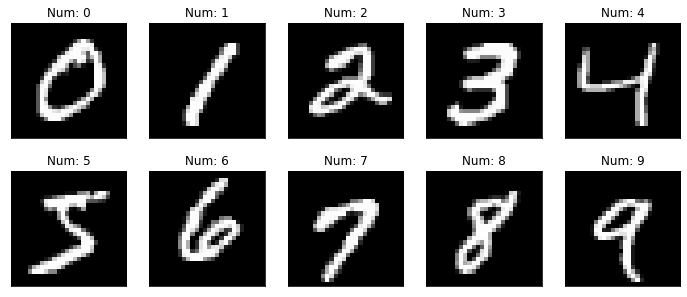

In [5]:
fig = plt.figure(figsize=(12,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[0], cmap="gray")
plt.show()

## 5. Pre-processing

In [7]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols) #X_train
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols) #X_test

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes) # y_train
test_labels = np_utils.to_categorical(test_labels, num_classes) # y_test

## 6. Define Neural Network Model

In [19]:
def simple_nn():
    # initialize model
    model = Sequential()
    
    # add an input layer and a hidden layer
    model.add(Dense(units=100, activation='sigmoid', input_dim = num_input_nodes))
    # add output layer
    model.add(Dense(units=num_classes, activation='softmax'))
    return model

Check the model summary - 

In [25]:
# define model by calling the function created above
model = simple_nn()

# define optimizer
sgd = SGD(lr=0.01)

# Compiling the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# print model information
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 7. Train the Model

In [26]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                     batch_size=64,
                     epochs=10, 
                     verbose=2, 
                     validation_split=0.2)
end = time.time()

total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.0869 - accuracy: 0.2310 - val_loss: 0.0783 - val_accuracy: 0.3551
Epoch 2/10
 - 3s - loss: 0.0725 - accuracy: 0.4455 - val_loss: 0.0664 - val_accuracy: 0.5364
Epoch 3/10
 - 3s - loss: 0.0627 - accuracy: 0.5654 - val_loss: 0.0581 - val_accuracy: 0.6141
Epoch 4/10
 - 3s - loss: 0.0560 - accuracy: 0.6258 - val_loss: 0.0521 - val_accuracy: 0.6643
Epoch 5/10
 - 3s - loss: 0.0507 - accuracy: 0.6750 - val_loss: 0.0473 - val_accuracy: 0.7089
Epoch 6/10
 - 3s - loss: 0.0465 - accuracy: 0.7152 - val_loss: 0.0434 - val_accuracy: 0.7449
Epoch 7/10
 - 3s - loss: 0.0429 - accuracy: 0.7448 - val_loss: 0.0399 - val_accuracy: 0.7700
Epoch 8/10
 - 3s - loss: 0.0398 - accuracy: 0.7681 - val_loss: 0.0371 - val_accuracy: 0.7906
Epoch 9/10
 - 4s - loss: 0.0372 - accuracy: 0.7888 - val_loss: 0.0346 - val_accuracy: 0.8083
Epoch 10/10
 - 3s - loss: 0.0349 - accuracy: 0.8071 - val_loss: 0.0325 - val_accuracy: 0.8268
Model took 33.19 se

In [22]:
from pprint import pprint as pp  # Pretty Print

In [27]:
pp(model_info.history)

{'accuracy': [0.231,
              0.44552085,
              0.5654375,
              0.62575,
              0.675,
              0.71522915,
              0.74475,
              0.76814586,
              0.78877085,
              0.8070833],
 'loss': [0.08689124969641368,
          0.07250351623694103,
          0.06272735398014387,
          0.05597429370880127,
          0.05072193010648092,
          0.046462402105331424,
          0.04285309267044067,
          0.03983964657535156,
          0.03717070511728525,
          0.034890765820940334],
 'val_accuracy': [0.3550833463668823,
                  0.5364166498184204,
                  0.6140833497047424,
                  0.6642500162124634,
                  0.7089166641235352,
                  0.7449166774749756,
                  0.7699999809265137,
                  0.7905833125114441,
                  0.8083333373069763,
                  0.8268333077430725],
 'val_loss': [0.0783391442100207,
              0.0664493369062

## 8. Plot Accuracy and Loss

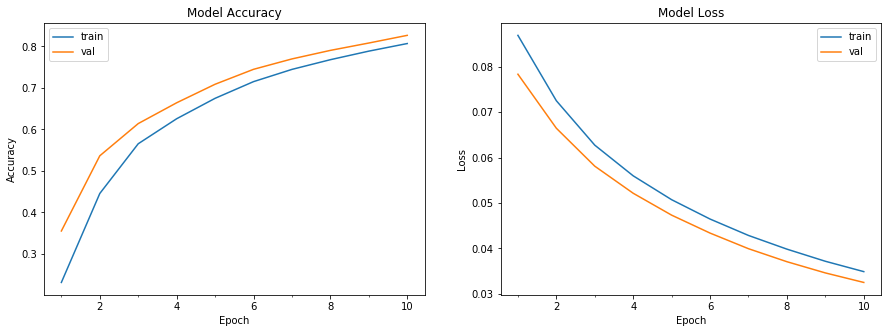

In [28]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(model_info)

<a id=section2></a>

# Experiment with Components

## 1. Original Model Testing

In [29]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (round(accuracy * 100, 2))

In [30]:
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

Accuracy on Test data is: 82.31%


### Observation - 
* Both __training and validation accuracy increase as the number of epochs increase.__ 
* More information is learned in each epoch.

## 2. Vary the Learning Rate

### Decrease the learning rate - 

In [31]:
# define model
model = simple_nn()

# define optimizer
sgd = SGD(lr=0.001)  # Learning Rate used in the earlier model was 0.01

# Compiling the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

Train the model again with new learning rate

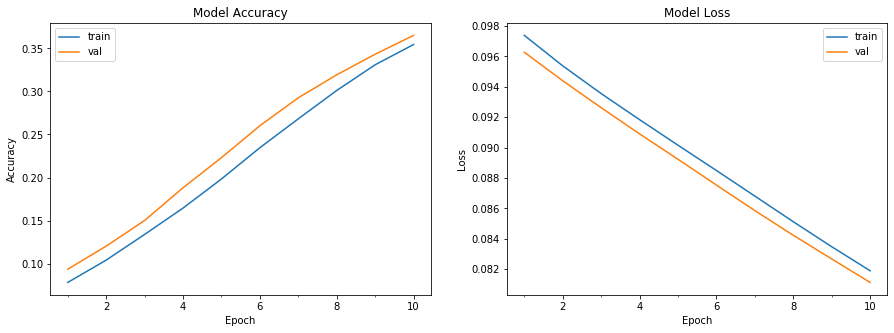

Model took 32.29 seconds to train
Accuracy on Test data is: 37.66%


In [32]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=64,
                       epochs=10, 
                       verbose=0, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Increase the learning rate -

In [33]:
# define model
model = simple_nn()

# define optimizer
sgd = SGD(lr=0.1)  # Learning Rate used in the earlier model was 0.01

# Compiling the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

Train the model again with new learning rate

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 106us/step - loss: 0.0589 - accuracy: 0.5905 - val_loss: 0.0353 - val_accuracy: 0.8129
Epoch 2/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.0299 - accuracy: 0.8361 - val_loss: 0.0233 - val_accuracy: 0.8787
Epoch 3/10
48000/48000 [==============================] - 5s 104us/step - loss: 0.0222 - accuracy: 0.8763 - val_loss: 0.0191 - val_accuracy: 0.8932
Epoch 4/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.0189 - accuracy: 0.8928 - val_loss: 0.0167 - val_accuracy: 0.9025
Epoch 5/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.0169 - accuracy: 0.9021 - val_loss: 0.0151 - val_accuracy: 0.9140
Epoch 6/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.0155 - accuracy: 0.9093 - val_loss: 0.0143 - val_accuracy: 0.9178
Epoch 7/10
48000/48000 [==============================] - 4s 90us

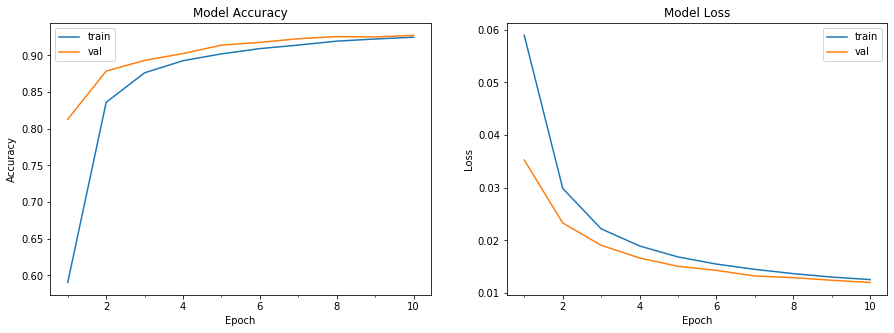

Model took 44.66 seconds to train
Accuracy on Test data is: 92.7%


In [34]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=64,
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
* If the __learning rate is decreased__, __less information is learned__ in each epoch and __more epochs are required to learn a good model.__ 
* If the __learning rate is increased, more information is learned__ in each epoch and __less epochs are required to learn a good model.__

## 3. Use Adam Optimizer instead of SGD

In [35]:
# Define model
model = simple_nn()

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 106us/step - loss: 0.0284 - accuracy: 0.8238 - val_loss: 0.0173 - val_accuracy: 0.8993
Epoch 2/10
48000/48000 [==============================] - 4s 93us/step - loss: 0.0170 - accuracy: 0.8960 - val_loss: 0.0151 - val_accuracy: 0.9048
Epoch 3/10
48000/48000 [==============================] - 5s 107us/step - loss: 0.0153 - accuracy: 0.9027 - val_loss: 0.0138 - val_accuracy: 0.9119
Epoch 4/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.0149 - accuracy: 0.9062 - val_loss: 0.0136 - val_accuracy: 0.9118
Epoch 5/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.0146 - accuracy: 0.9076 - val_loss: 0.0136 - val_accuracy: 0.9138
Epoch 6/10
48000/48000 [==============================] - 5s 106us/step - loss: 0.0147 - accuracy: 0.9072 - val_loss: 0.0138 - val_accuracy: 0.9109
Epoch 7/10
48000/48000 [==============================] - 5s 94

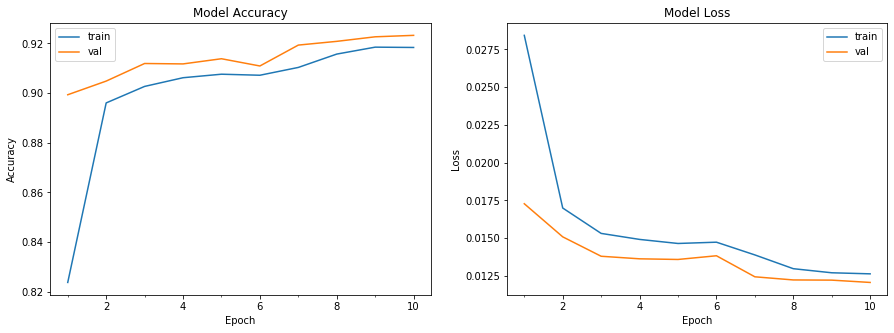

Model took 52.76 seconds to train
Accuracy on Test data is: 91.89%


In [36]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=64,
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
Using Adam optimizer, we __don’t need to specify a learning rate. However, the training time increases.__

## 4. Vary the Batch Size

### Decreasing the Batch Size to - 32

In [38]:
# Define model
model = simple_nn()

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 179us/step - loss: 0.0284 - accuracy: 0.8258 - val_loss: 0.0188 - val_accuracy: 0.8906
Epoch 2/10
48000/48000 [==============================] - 8s 163us/step - loss: 0.0182 - accuracy: 0.8870 - val_loss: 0.0164 - val_accuracy: 0.8929
Epoch 3/10
48000/48000 [==============================] - 10s 215us/step - loss: 0.0167 - accuracy: 0.8934 - val_loss: 0.0148 - val_accuracy: 0.9051
Epoch 4/10
48000/48000 [==============================] - 8s 173us/step - loss: 0.0157 - accuracy: 0.8993 - val_loss: 0.0135 - val_accuracy: 0.9139
Epoch 5/10
48000/48000 [==============================] - 8s 166us/step - loss: 0.0150 - accuracy: 0.9028 - val_loss: 0.0146 - val_accuracy: 0.9080
Epoch 6/10
48000/48000 [==============================] - 8s 162us/step - loss: 0.0147 - accuracy: 0.9040 - val_loss: 0.0141 - val_accuracy: 0.9097
Epoch 7/10
48000/48000 [==============================] - 8s 

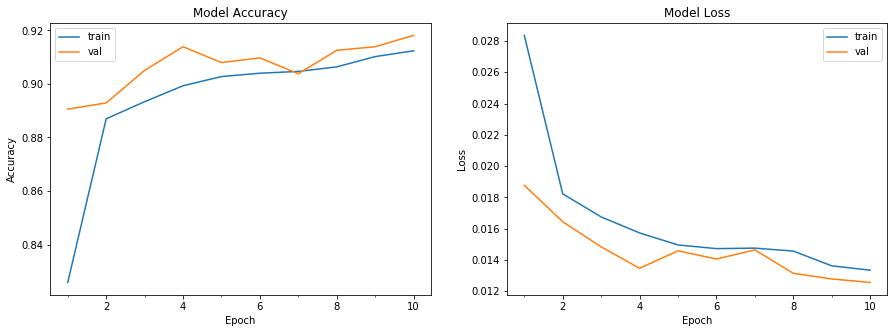

Model took 87.14 seconds to train
Accuracy on Test data is: 91.65%


In [39]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=32,  # The batch-size in earlier models was 64
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
Decreasing the batch size __increases the training time while increasing the rate of learning.__

### Increasing the Batch Size to - 128

In [47]:
# Define model
model = simple_nn()

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Fitting the model

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 59us/step - loss: 0.0308 - accuracy: 0.8081 - val_loss: 0.0167 - val_accuracy: 0.9016
Epoch 2/10
48000/48000 [==============================] - 3s 56us/step - loss: 0.0166 - accuracy: 0.8991 - val_loss: 0.0150 - val_accuracy: 0.9079
Epoch 3/10
48000/48000 [==============================] - 3s 56us/step - loss: 0.0146 - accuracy: 0.9094 - val_loss: 0.0131 - val_accuracy: 0.9178
Epoch 4/10
48000/48000 [==============================] - 3s 57us/step - loss: 0.0136 - accuracy: 0.9149 - val_loss: 0.0128 - val_accuracy: 0.9175
Epoch 5/10
48000/48000 [==============================] - 3s 58us/step - loss: 0.0127 - accuracy: 0.9194 - val_loss: 0.0131 - val_accuracy: 0.9202
Epoch 6/10
48000/48000 [==============================] - 3s 68us/step - loss: 0.0128 - accuracy: 0.9187 - val_loss: 0.0121 - val_accuracy: 0.9212
Epoch 7/10
48000/48000 [==============================] - 3s 64us/st

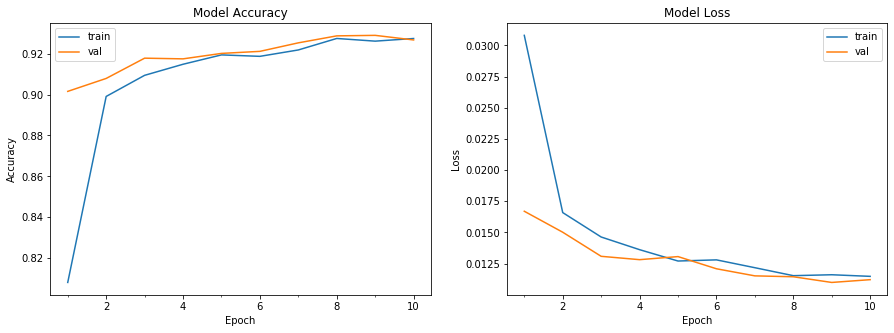

Model took 29.39 seconds to train
Accuracy on Test data is: 92.93%


In [48]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128,  # The batch-size in earlier models was 64
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
Increasing the batch size __decreases the training time but reduces the rate of learning.__

## 5. Cost Function as Categorical Crossentropy

In [45]:
# Define model
model = simple_nn()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting the model

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.6904 - accuracy: 0.8154 - val_loss: 0.3823 - val_accuracy: 0.8991
Epoch 2/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.3670 - accuracy: 0.8989 - val_loss: 0.3046 - val_accuracy: 0.9146
Epoch 3/10
48000/48000 [==============================] - 3s 67us/step - loss: 0.3092 - accuracy: 0.9129 - val_loss: 0.2826 - val_accuracy: 0.9210
Epoch 4/10
48000/48000 [==============================] - 3s 69us/step - loss: 0.2862 - accuracy: 0.9180 - val_loss: 0.2682 - val_accuracy: 0.9222
Epoch 5/10
48000/48000 [==============================] - 4s 73us/step - loss: 0.2712 - accuracy: 0.9211 - val_loss: 0.2651 - val_accuracy: 0.9249
Epoch 6/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.2591 - accuracy: 0.9240 - val_loss: 0.2494 - val_accuracy: 0.9270
Epoch 7/10
48000/48000 [==============================] - 3s 60us/st

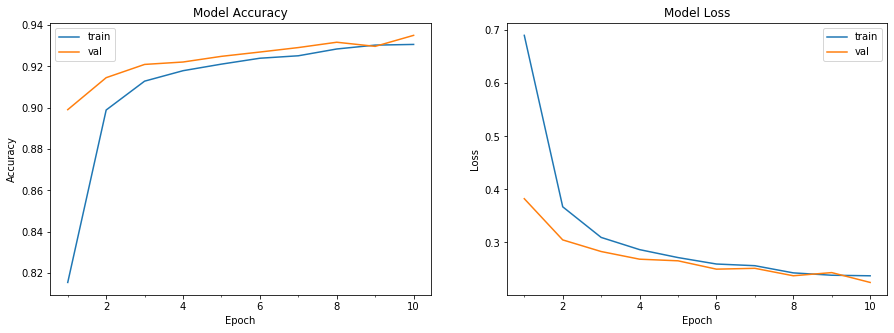

Model took 31.63 seconds to train
Accuracy on Test data is: 93.57%


In [46]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128,
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
* Changing the cost function to categorical crossentropy __reduced the training time.__ 
* The decrease in training time is significant when using SGD for this experiment.

## 6. Increase the Number of Epochs

In [49]:
# Define model
model = simple_nn()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting the model

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.7364 - accuracy: 0.8076 - val_loss: 0.3832 - val_accuracy: 0.8988
Epoch 2/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.3632 - accuracy: 0.9001 - val_loss: 0.3271 - val_accuracy: 0.9093
Epoch 3/50
48000/48000 [==============================] - 3s 67us/step - loss: 0.3157 - accuracy: 0.9114 - val_loss: 0.2903 - val_accuracy: 0.9183
Epoch 4/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.2941 - accuracy: 0.9159 - val_loss: 0.2710 - val_accuracy: 0.9201
Epoch 5/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.2677 - accuracy: 0.9214 - val_loss: 0.2434 - val_accuracy: 0.9268
Epoch 6/50
48000/48000 [==============================] - 3s 71us/step - loss: 0.2573 - accuracy: 0.9243 - val_loss: 0.2497 - val_accuracy: 0.9261
Epoch 7/50
48000/48000 [==============================] - 4s 79us/st

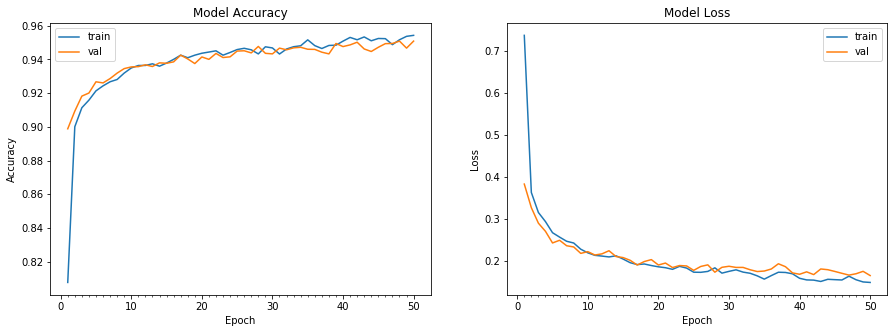

Model took 155.92 seconds to train
Accuracy on Test data is: 95.0%


In [50]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128,
                       epochs=50, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
* As the number of epochs increase, more information is learned. 
* The __training as well as validation accuracy increases and then stabilizes.__

## 7. Deep Neural Network

Lets define a Deep Neural Network Model

In [51]:
def deep_nn():
    # Define a deep neural network
    model = Sequential()
    # Adding Hidden Layers
    model.add(Dense(512, activation='relu', input_dim=num_input_nodes))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    # Adding Output Layer
    model.add(Dense(num_classes, activation='softmax'))
    return model

Compile the model

In [52]:
# Define the Deep Neural Network
model = deep_nn()

# Define optimizer
sgd = SGD(lr=0.1)

# Compiling the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


Fitting the model

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 198us/step - loss: 0.1157 - accuracy: 0.4122 - val_loss: 0.0956 - val_accuracy: 0.5171
Epoch 2/10
48000/48000 [==============================] - 9s 191us/step - loss: 0.0764 - accuracy: 0.6128 - val_loss: 0.0701 - val_accuracy: 0.6445
Epoch 3/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0704 - accuracy: 0.6441 - val_loss: 0.0672 - val_accuracy: 0.6600
Epoch 4/10
48000/48000 [==============================] - 9s 195us/step - loss: 0.0680 - accuracy: 0.6564 - val_loss: 0.0657 - val_accuracy: 0.6687
Epoch 5/10
48000/48000 [==============================] - 10s 200us/step - loss: 0.0549 - accuracy: 0.7208 - val_loss: 0.0279 - val_accuracy: 0.8555
Epoch 6/10
48000/48000 [==============================] - 13s 280us/step - loss: 0.0220 - accuracy: 0.8867 - val_loss: 0.0190 - val_accuracy: 0.9020
Epoch 7/10
48000/48000 [==============================] - 9

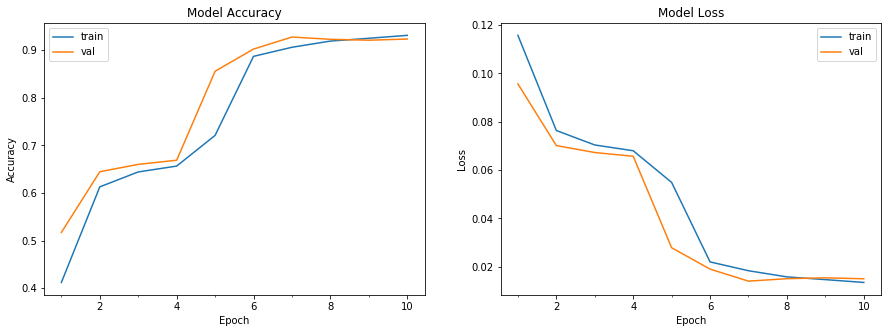

Model took 97.99 seconds to train
Accuracy on Test data is: 91.89%


In [54]:
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128,
                       epochs=10, 
                       verbose=1, 
                       validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

### Observation - 
* By adding more hidden layers, __training time as well as information learned in each epoch increases.__ 
* It helps to improve the performance for complex tasks but __may not help significantly for relatively simple datasets such as MNIST.__

## 8. Save Model

Specify the directory to save the model - 

In [56]:
from keras.callbacks import ModelCheckpoint
import os

# define a deep neural network
model = deep_nn()
# define optimizer
sgd = SGD(lr=0.1)
# Compiling the model
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"

In [57]:
filepath

'./output-mnist/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5'

Checkpoint the model and save after every 10th epoch - 

In [58]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=False, save_weights_only=True, 
                             mode='auto', period=2)
callbacks_list = [checkpoint]

# train the model
model_info = model.fit(train_features, train_labels, 
                       batch_size=128, 
                       epochs=10, 
                       callbacks=callbacks_list, 
                       verbose=1, 
                       validation_split=0.2)

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 264us/step - loss: 0.1552 - accuracy: 0.2197 - val_loss: 0.1099 - val_accuracy: 0.4450
Epoch 2/10
48000/48000 [==============================] - 14s 284us/step - loss: 0.0803 - accuracy: 0.5923 - val_loss: 0.0546 - val_accuracy: 0.7222

Epoch 00002: saving model to ./output-mnist/weights-02-0.72.hdf5
Epoch 3/10
48000/48000 [==============================] - 10s 212us/step - loss: 0.0582 - accuracy: 0.7048 - val_loss: 0.0529 - val_accuracy: 0.7321
Epoch 4/10
48000/48000 [==============================] - 11s 219us/step - loss: 0.0542 - accuracy: 0.7257 - val_loss: 0.0547 - val_accuracy: 0.7235

Epoch 00004: saving model to ./output-mnist/weights-04-0.72.hdf5
Epoch 5/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.0519 - accuracy: 0.7376 - val_loss: 0.0499 - val_accuracy: 0.7477
Epoch 6/10
48000/48000 [==============================] - 12s 253us/step 

## 9. Resume Training by Loading a Saved Model

* When __training big models, it is often convenient to break training into steps.__ (Here we load model after epoch 10)
* Train when you are not working, work when not training.

In [34]:
# define model
model = deep_nn()

# load weights
import os, glob
epoch_num = 10
outputFolder = './output-mnist'
file_ini = outputFolder+'/weights-'+ str(epoch_num)+'*'
filename =  glob.glob(file_ini)
if os.path.isfile(filename[0]):
    model.load_weights(filename[0])
else:
    print ("%s does not exist"%filename[0])

# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"

Resume training, save model again for training later - 

In [35]:
filepath=outputFolder+"/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=False, save_weights_only=True,
                             mode='auto', period=2)
callbacks_list = [checkpoint]

# train the model
model_info = model.fit(train_features, train_labels, batch_size=128,
                       epochs=10, callbacks=callbacks_list, verbose=0,
                       validation_split=0.2, initial_epoch = epoch_num+1)

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))

Accuracy on Test data is: 93.58%


## 10. Early Stopping

* Early stopping helps as a form of regularization, __stopping training before validation loss starts increasing.__
* We define a term __patience in stopping as the no. of epochs to wait before termination__, even when loss increases, since it may decrease later.

In [1]:
#define model
model = deep_nn()

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'deep_nn' is not defined

In [46]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [47]:
# Define Early Stopping callback
earlystop = EarlyStopping(monitor='val_accuracy', 
                          min_delta=0.0001, 
                          patience=2, 
                          verbose=1, 
                          mode='auto')

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=True,
                             mode='auto', 
                             period=2)

callbacks_list = [earlystop, checkpoint]

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s 172us/step - loss: 1.2936 - accuracy: 0.8789 - val_loss: 0.2673 - val_accuracy: 0.9378
Epoch 2/50
48000/48000 [==============================] - 8s 168us/step - loss: 0.1902 - accuracy: 0.9494 - val_loss: 0.2180 - val_accuracy: 0.9459

Epoch 00002: saving model to ./output-mnist/weights-02-0.95.hdf5
Epoch 3/50
48000/48000 [==============================] - 8s 168us/step - loss: 0.1186 - accuracy: 0.9662 - val_loss: 0.1652 - val_accuracy: 0.9586
Epoch 4/50
48000/48000 [==============================] - 9s 189us/step - loss: 0.0868 - accuracy: 0.9741 - val_loss: 0.1635 - val_accuracy: 0.9627

Epoch 00004: saving model to ./output-mnist/weights-04-0.96.hdf5
Epoch 5/50
48000/48000 [==============================] - 8s 176us/step - loss: 0.0814 - accuracy: 0.9758 - val_loss: 0.1738 - val_accuracy: 0.9592
Epoch 6/50
48000/48000 [==============================] - 9s 179us/step - loss

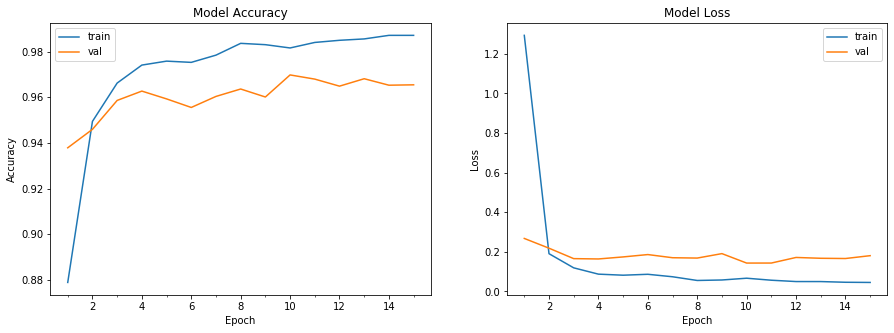

Accuracy on Test data is: 96.91%


In [48]:
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128,
                       epochs=50, 
                       callbacks=callbacks_list, 
                       verbose=1,
                       validation_split=0.2)
end = time.time()

# Time taken
total_time = round(end - start, 2)
print("Model took {} seconds to train".format(total_time))

# plot model history
plot_model_history(model_info)

# compute test accuracy
model_accuracy = accuracy(test_features, test_labels, model)
print("Accuracy on Test data is: {}%".format(model_accuracy))